In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


born = pd.read_csv("born1.csv")
edufee = pd.read_csv("edufee.csv")

In [2]:
born = born.set_index('기본항목별').T
edufee = edufee.set_index("과목 및 유형").T

In [3]:
correlation = pd.concat([born, edufee], axis=1)
display(correlation)
correlation.drop(columns = ['과목 및 유형'], inplace = True)

,합계출산율(명),과목 및 유형,사교육비
2007,1.259,평 균 (만원),22.2
2008,1.192,평 균 (만원),23.3
2009,1.149,평 균 (만원),24.2
2010,1.226,평 균 (만원),24.0
2011,1.244,평 균 (만원),24.0
2012,1.297,평 균 (만원),23.6
2013,1.187,평 균 (만원),23.9
2014,1.205,평 균 (만원),24.2
2015,1.239,평 균 (만원),24.4
2016,1.172,평 균 (만원),25.6


In [4]:
cor = correlation.astype('float')
corellation = cor.corr()
corel = corellation['합계출산율(명)'][1]
print(type(corel))

<class 'numpy.float64'>


In [5]:
y = cor['합계출산율(명)']
x = cor['사교육비']
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y)

LinearRegression()

In [6]:
line_fitter.coef_

array([-0.03047345])

In [7]:
line_fitter.intercept_

1.9260800900671877

In [8]:
t = cor.corr()
print(t['사교육비'][0])

-0.9288160913923078


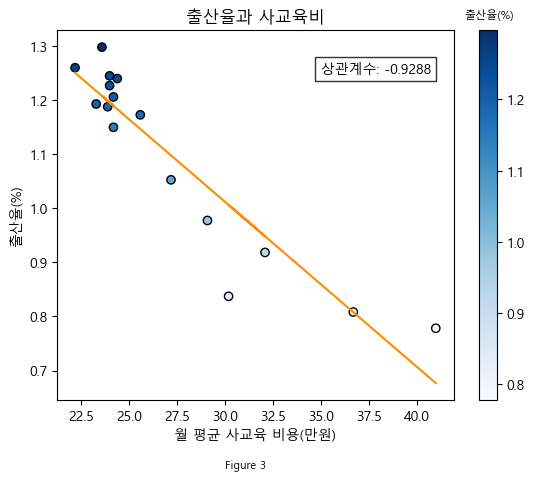

In [9]:
plt.scatter(x, y, c=y, cmap='Blues', edgecolor = 'black')
plt.plot(x, line_fitter.predict(x.values.reshape(-1,1)), color='darkorange')
plt.title('출산율과 사교육비')
plt.ylabel('출산율(%)')
plt.xlabel('월 평균 사교육 비용(만원)')
plt.colorbar()
plt.text(35,1.25,'상관계수: {:.4f}'.format(t['사교육비'][0]), bbox = dict(facecolor = 'white', alpha =.8))
plt.text(42.5, 1.35, '출산율(%)', size=8)
plt.text(30, 0.52,'Figure 3', size=8)
plt.show()

In [10]:
percen = pd.read_csv('percentage.csv')


AttributeError: 'DataFrame' object has no attribute 'haed'

In [28]:
percen.head()

,과목 및 유형,2022
0,과목 및 유형,평 균 (%)
1,사교육 참여,78.3


In [19]:
x = percen.set_index('과목 및 유형').T
x

과목 및 유형,과목 및 유형,사교육 참여
2022,평 균 (%),78.3


In [20]:
num = x['사교육 참여'].astype('float')
print(type(num[0]))

<class 'numpy.float64'>


In [21]:
t = num.tolist()

In [22]:
t.append((100-t[0]))
index = ['사교육 참여', '사교육 비참여']

In [23]:
print(t)
print(type(t))
print(index)
print(type(index))

[78.3, 21.700000000000003]
<class 'list'>
['사교육 참여', '사교육 비참여']
<class 'list'>


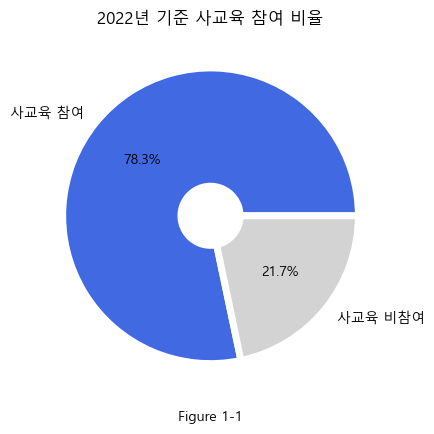

In [59]:
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(t,labels = index, autopct='%.1f%%', colors = ['royalblue','lightgrey'], wedgeprops=wedgeprops)
plt.title('2022년 기준 사교육 참여 비율')
plt.xlabel('Figure 1-1')
plt.show()

In [43]:
a = pd.read_csv('aa.csv')
a.head()

,과목 및 유형,2022,2022.1,2022.2
0,과목 및 유형,초등학교 (%),중학교 (%),고등학교 (%)
1,사교육 참여,85.2,76.2,66.0


In [44]:
a = a.set_index('과목 및 유형').T
a

과목 및 유형,과목 및 유형,사교육 참여
2022,초등학교 (%),85.2
2022.1,중학교 (%),76.2
2022.2,고등학교 (%),66.0


In [58]:
q = a['사교육 참여'].astype('float').tolist()

1.0881226053639848
0.9731800766283526
0.842911877394636


([<matplotlib.patches.Wedge at 0x2b2286049d0>,
 [Text(0.42200457259494883, 1.0158307638130255, ''),
  Text(-1.061528792226562, -0.28836890136423704, ''),
  Text(0.6735490959941439, -0.8696732807701244, '')])

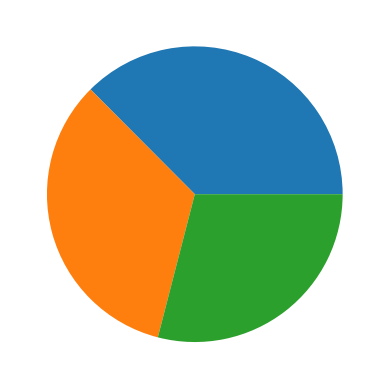

In [55]:
plt.pie(q)